In [7]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import keras
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from keras import regularizers
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import time

import seaborn as sns
plt.style.use('seaborn')
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')

# Importing Data:

In [9]:
df1 = pd.read_csv('Data\preprocessed_keppler_data(knn=5)(multilayer).csv')

In [10]:
df1

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_time0,koi_duration,ra,dec,...,koi_insol,koi_teq,koi_prad,koi_ror,koi_depth,koi_impact,koi_eccen,koi_disposition_CANDIDATE,koi_disposition_CONFIRMED,koi_disposition_FALSE POSITIVE
0,0,0,0,0,9.488036,170.538750,2455003.539,2.95750,291.93423,48.141651,...,93.59,793.0,2.26,0.022344,615.8,0.146,0.0,0.0,1.0,0.0
1,0,0,0,0,54.418383,162.513840,2454995.514,4.50700,291.93423,48.141651,...,9.11,443.0,2.83,0.027954,874.8,0.586,0.0,0.0,1.0,0.0
2,0,0,0,0,19.899140,175.850252,2455008.850,1.78220,297.00482,48.134129,...,39.30,638.0,14.60,0.154046,10829.0,0.969,0.0,1.0,0.0,0.0
3,0,1,0,0,1.736952,170.307565,2455003.308,2.40641,285.53461,48.285210,...,891.96,1395.0,33.46,0.387394,8079.2,1.276,0.0,0.0,0.0,1.0
4,0,0,0,0,2.525592,171.595550,2455004.596,1.65450,288.75488,48.226200,...,926.16,1406.0,2.75,0.024064,603.3,0.701,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9558,0,1,1,0,0.527699,131.705093,2454964.705,3.22210,297.18875,47.093819,...,4500.53,2088.0,29.35,0.297633,1579.2,1.252,0.0,0.0,0.0,1.0
9559,0,0,0,0,1.739849,133.001270,2454966.001,3.11400,286.50937,47.163219,...,1585.81,1608.0,0.72,0.006379,48.5,0.043,0.0,1.0,0.0,0.0
9560,0,0,1,0,0.681402,132.181750,2454965.182,0.86500,294.16489,47.176281,...,5713.41,2218.0,1.07,0.009444,103.6,0.147,0.0,0.0,0.0,1.0
9561,0,0,0,0,333.486169,153.615010,2454986.615,3.19900,296.76288,47.145142,...,22.68,557.0,19.30,0.022590,639.1,0.214,0.0,1.0,0.0,0.0


#### ------- Creating helper functions for testing of the architectures: -------

In [11]:
#To get the dataset
def get_dataset():
    
    # Filtering the columns:
    X = df1.iloc[:, 0:-3].values
    y = df1.iloc[:, -3:].values
    
    return X, y

----------- Functions for the different architectures: -----------

In [12]:
#To get the model1
def get_model(n_inputs, n_outputs):
    model = Sequential()
     
    model.add(Dense(32, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
    
    return model

In [13]:
#To get the model
def get_model2(n_inputs, n_outputs):
    model = Sequential()
    
    model.add(layers.Dense(64, activation='relu', input_dim = n_inputs))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(n_outputs, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
    
    return model

In [14]:
#To get the model
def get_model3(n_inputs, n_outputs):
    model = Sequential()
    
    model.add(Dense(100, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
    
    return model

In [15]:
#To get the model
def get_model4(n_inputs, n_outputs):
    model = Sequential()
    
    model.add(layers.Dense(100, activation='relu', input_dim = n_inputs))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(n_outputs, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
    
    return model

---- Function for cross validation ---

In [16]:
#To evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y, model_function):
    seconds = list()
    results = list()
    result_training = list()
    n_inputs, n_outputs = X.shape[1], y.shape[1]    
    
    # define evaluation procedure (cross validation)
    cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)
    
    # enumerate folds
    for train_ix, test_ix in cv.split(X):
        
        #print(train_ix, test_ix)
        
        # prepare data
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]
        
        
        scaler = StandardScaler().fit(X_train)

        #Scaling:
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        
        # Time execution (start)
        start = time.time()
        
        # define model
        model = model_function(n_inputs, n_outputs)
        # fit model
        model.fit(X_train, y_train, verbose=0, epochs=100)
        
        # Time execution (end)
        end = time.time()
        seconds.append(end - start)
        
         # ------ make a prediction on the training set ------
        yhat = model.predict(X_train)
        # round probabilities to class labels
        yhat = yhat.round()
        # calculate accuracy
        acc = accuracy_score(y_train, yhat)
        
        # store result
        print('Training>%.3f' % acc)
        result_training.append(acc)
        
        # ------ make a prediction on the test set ------
        yhat = model.predict(X_test)
        # round probabilities to class labels
        yhat = yhat.round()
        # calculate accuracy
        acc = accuracy_score(y_test, yhat)
        
        # store result
        print('>%.3f' % acc)
        results.append(acc)
        
    return seconds, results, result_training

# Checking results per epoch:

We have different architectures to test the accuracy on:

In [17]:
X, y = get_dataset()

# Creating trainin, test and validation
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.2, random_state=1, stratify = y_train1)

# -- Scaling --
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5355, 26) (5355, 3)
(2869, 26) (2869, 3)


In [18]:
classifier = get_model(X_train.shape[1], y_train.shape[1])

history = classifier.fit( X_train, y_train, 
                          epochs=200, batch_size=200,
                          validation_data = (X_test, y_test) )

Epoch 1/200
27/27 [==============================] - 1s 9ms/step - loss: 0.7560 - accuracy: 0.3180 - val_loss: 0.6358 - val_accuracy: 0.4908
Epoch 2/200
27/27 [==============================] - 0s 2ms/step - loss: 0.6000 - accuracy: 0.5551 - val_loss: 0.5334 - val_accuracy: 0.6591
Epoch 3/200
27/27 [==============================] - 0s 3ms/step - loss: 0.5148 - accuracy: 0.6679 - val_loss: 0.4652 - val_accuracy: 0.7093
Epoch 4/200
27/27 [==============================] - 0s 3ms/step - loss: 0.4539 - accuracy: 0.7078 - val_loss: 0.4161 - val_accuracy: 0.7327
Epoch 5/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4100 - accuracy: 0.7217 - val_loss: 0.3800 - val_accuracy: 0.7476
Epoch 6/200
27/27 [==============================] - 0s 3ms/step - loss: 0.3644 - accuracy: 0.7646 - val_loss: 0.3520 - val_accuracy: 0.7585
Epoch 7/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3502 - accuracy: 0.7577 - val_loss: 0.3301 - val_accuracy: 0.7738
Epoch 8/200
2

Epoch 59/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1916 - accuracy: 0.8627 - val_loss: 0.1968 - val_accuracy: 0.8592
Epoch 60/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1945 - accuracy: 0.8555 - val_loss: 0.1962 - val_accuracy: 0.8571
Epoch 61/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.8667 - val_loss: 0.1961 - val_accuracy: 0.8578
Epoch 62/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1926 - accuracy: 0.8624 - val_loss: 0.1961 - val_accuracy: 0.8588
Epoch 63/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1901 - accuracy: 0.8649 - val_loss: 0.1957 - val_accuracy: 0.8595
Epoch 64/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1891 - accuracy: 0.8670 - val_loss: 0.1956 - val_accuracy: 0.8585
Epoch 65/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1872 - accuracy: 0.8686 - val_loss: 0.1953 - val_accuracy: 0.8602
Epoch 

27/27 [==============================] - 0s 2ms/step - loss: 0.1710 - accuracy: 0.8757 - val_loss: 0.1877 - val_accuracy: 0.8630
Epoch 174/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1708 - accuracy: 0.8810 - val_loss: 0.1874 - val_accuracy: 0.8644
Epoch 175/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1682 - accuracy: 0.8754 - val_loss: 0.1879 - val_accuracy: 0.8648
Epoch 176/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1633 - accuracy: 0.8837 - val_loss: 0.1878 - val_accuracy: 0.8644
Epoch 177/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1758 - accuracy: 0.8745 - val_loss: 0.1876 - val_accuracy: 0.8630
Epoch 178/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1695 - accuracy: 0.8822 - val_loss: 0.1878 - val_accuracy: 0.8648
Epoch 179/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1805 - accuracy: 0.8660 - val_loss: 0.1878 - val_accuracy: 0.8651
Epoch 180/200

In [19]:
classifier2 = get_model2(X_train.shape[1], y_train.shape[1])

history2 = classifier2.fit( X_train, y_train, 
                          epochs=200, batch_size=200,
                          validation_data = (X_test, y_test) )

Epoch 1/200
27/27 [==============================] - 0s 6ms/step - loss: 0.9686 - accuracy: 0.5045 - val_loss: 0.6384 - val_accuracy: 0.7452
Epoch 2/200
27/27 [==============================] - 0s 2ms/step - loss: 0.5788 - accuracy: 0.7619 - val_loss: 0.4550 - val_accuracy: 0.8006
Epoch 3/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4416 - accuracy: 0.8120 - val_loss: 0.3867 - val_accuracy: 0.8142
Epoch 4/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3772 - accuracy: 0.8283 - val_loss: 0.3484 - val_accuracy: 0.8344
Epoch 5/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3394 - accuracy: 0.8478 - val_loss: 0.3339 - val_accuracy: 0.8393
Epoch 6/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3337 - accuracy: 0.8496 - val_loss: 0.3175 - val_accuracy: 0.8522
Epoch 7/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3158 - accuracy: 0.8543 - val_loss: 0.3106 - val_accuracy: 0.8543
Epoch 8/200
2

Epoch 59/200
27/27 [==============================] - 0s 2ms/step - loss: 0.2129 - accuracy: 0.9014 - val_loss: 0.2914 - val_accuracy: 0.8731
Epoch 60/200
27/27 [==============================] - 0s 2ms/step - loss: 0.2039 - accuracy: 0.9092 - val_loss: 0.2901 - val_accuracy: 0.8682
Epoch 61/200
27/27 [==============================] - 0s 2ms/step - loss: 0.2085 - accuracy: 0.9031 - val_loss: 0.2899 - val_accuracy: 0.8662
Epoch 62/200
27/27 [==============================] - 0s 2ms/step - loss: 0.2085 - accuracy: 0.9058 - val_loss: 0.2898 - val_accuracy: 0.8717
Epoch 63/200
27/27 [==============================] - 0s 2ms/step - loss: 0.2072 - accuracy: 0.9067 - val_loss: 0.2903 - val_accuracy: 0.8679
Epoch 64/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1978 - accuracy: 0.9080 - val_loss: 0.2917 - val_accuracy: 0.8669
Epoch 65/200
27/27 [==============================] - 0s 2ms/step - loss: 0.2033 - accuracy: 0.9059 - val_loss: 0.2922 - val_accuracy: 0.8682
Epoch 

27/27 [==============================] - 0s 2ms/step - loss: 0.1169 - accuracy: 0.9522 - val_loss: 0.3986 - val_accuracy: 0.8620
Epoch 174/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1199 - accuracy: 0.9532 - val_loss: 0.3939 - val_accuracy: 0.8592
Epoch 175/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1143 - accuracy: 0.9543 - val_loss: 0.4044 - val_accuracy: 0.8588
Epoch 176/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1174 - accuracy: 0.9545 - val_loss: 0.4022 - val_accuracy: 0.8599
Epoch 177/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1187 - accuracy: 0.9568 - val_loss: 0.4045 - val_accuracy: 0.8602
Epoch 178/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1171 - accuracy: 0.9509 - val_loss: 0.4138 - val_accuracy: 0.8574
Epoch 179/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1204 - accuracy: 0.9522 - val_loss: 0.4088 - val_accuracy: 0.8592
Epoch 180/200

In [20]:
classifier3 = get_model(X_train.shape[1], y_train.shape[1])

history3 = classifier3.fit( X_train, y_train, 
                          epochs=200, batch_size=200,
                          validation_data = (X_test, y_test) )

Epoch 1/200
27/27 [==============================] - 0s 6ms/step - loss: 0.8212 - accuracy: 0.2689 - val_loss: 0.6946 - val_accuracy: 0.3583
Epoch 2/200
27/27 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.3938 - val_loss: 0.5808 - val_accuracy: 0.5193
Epoch 3/200
27/27 [==============================] - 0s 2ms/step - loss: 0.5658 - accuracy: 0.5473 - val_loss: 0.5020 - val_accuracy: 0.6445
Epoch 4/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4904 - accuracy: 0.6475 - val_loss: 0.4443 - val_accuracy: 0.7013
Epoch 5/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.6944 - val_loss: 0.3998 - val_accuracy: 0.7306
Epoch 6/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3973 - accuracy: 0.7209 - val_loss: 0.3656 - val_accuracy: 0.7536
Epoch 7/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3609 - accuracy: 0.7497 - val_loss: 0.3393 - val_accuracy: 0.7647
Epoch 8/200
2

Epoch 59/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1940 - accuracy: 0.8560 - val_loss: 0.1960 - val_accuracy: 0.8540
Epoch 60/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1933 - accuracy: 0.8617 - val_loss: 0.1958 - val_accuracy: 0.8550
Epoch 61/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1909 - accuracy: 0.8599 - val_loss: 0.1956 - val_accuracy: 0.8554
Epoch 62/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1920 - accuracy: 0.8643 - val_loss: 0.1954 - val_accuracy: 0.8543
Epoch 63/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1961 - accuracy: 0.8561 - val_loss: 0.1950 - val_accuracy: 0.8564
Epoch 64/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1940 - accuracy: 0.8587 - val_loss: 0.1950 - val_accuracy: 0.8547
Epoch 65/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1868 - accuracy: 0.8651 - val_loss: 0.1947 - val_accuracy: 0.8564
Epoch 

27/27 [==============================] - 0s 2ms/step - loss: 0.1687 - accuracy: 0.8779 - val_loss: 0.1835 - val_accuracy: 0.8623
Epoch 174/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1707 - accuracy: 0.8782 - val_loss: 0.1832 - val_accuracy: 0.8641
Epoch 175/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1675 - accuracy: 0.8877 - val_loss: 0.1834 - val_accuracy: 0.8655
Epoch 176/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1707 - accuracy: 0.8751 - val_loss: 0.1833 - val_accuracy: 0.8658
Epoch 177/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1720 - accuracy: 0.8748 - val_loss: 0.1830 - val_accuracy: 0.8644
Epoch 178/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1658 - accuracy: 0.8861 - val_loss: 0.1832 - val_accuracy: 0.8658
Epoch 179/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1731 - accuracy: 0.8713 - val_loss: 0.1829 - val_accuracy: 0.8634
Epoch 180/200

In [21]:
classifier4 = get_model(X_train.shape[1], y_train.shape[1])

history4 = classifier4.fit( X_train, y_train, 
                          epochs=200, batch_size=200,
                          validation_data = (X_test, y_test) )

Epoch 1/200
27/27 [==============================] - 0s 6ms/step - loss: 0.8635 - accuracy: 0.2424 - val_loss: 0.7156 - val_accuracy: 0.4235
Epoch 2/200
27/27 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.4576 - val_loss: 0.5818 - val_accuracy: 0.5838
Epoch 3/200
27/27 [==============================] - 0s 2ms/step - loss: 0.5576 - accuracy: 0.6114 - val_loss: 0.4911 - val_accuracy: 0.6912
Epoch 4/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4786 - accuracy: 0.6996 - val_loss: 0.4275 - val_accuracy: 0.7466
Epoch 5/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4187 - accuracy: 0.7474 - val_loss: 0.3826 - val_accuracy: 0.7741
Epoch 6/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3772 - accuracy: 0.7641 - val_loss: 0.3500 - val_accuracy: 0.7895
Epoch 7/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3458 - accuracy: 0.7846 - val_loss: 0.3256 - val_accuracy: 0.8048
Epoch 8/200
2

Epoch 59/200
27/27 [==============================] - 0s 3ms/step - loss: 0.2005 - accuracy: 0.8551 - val_loss: 0.1976 - val_accuracy: 0.8519
Epoch 60/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1983 - accuracy: 0.8613 - val_loss: 0.1975 - val_accuracy: 0.8526
Epoch 61/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1963 - accuracy: 0.8624 - val_loss: 0.1973 - val_accuracy: 0.8522
Epoch 62/200
27/27 [==============================] - 0s 2ms/step - loss: 0.2025 - accuracy: 0.8537 - val_loss: 0.1973 - val_accuracy: 0.8540
Epoch 63/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1900 - accuracy: 0.8712 - val_loss: 0.1970 - val_accuracy: 0.8536
Epoch 64/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1910 - accuracy: 0.8651 - val_loss: 0.1966 - val_accuracy: 0.8533
Epoch 65/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1975 - accuracy: 0.8542 - val_loss: 0.1967 - val_accuracy: 0.8557
Epoch 

27/27 [==============================] - 0s 2ms/step - loss: 0.1696 - accuracy: 0.8770 - val_loss: 0.1876 - val_accuracy: 0.8606
Epoch 174/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1738 - accuracy: 0.8739 - val_loss: 0.1878 - val_accuracy: 0.8609
Epoch 175/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1684 - accuracy: 0.8730 - val_loss: 0.1872 - val_accuracy: 0.8623
Epoch 176/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1701 - accuracy: 0.8704 - val_loss: 0.1874 - val_accuracy: 0.8599
Epoch 177/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1701 - accuracy: 0.8787 - val_loss: 0.1875 - val_accuracy: 0.8620
Epoch 178/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1699 - accuracy: 0.8792 - val_loss: 0.1875 - val_accuracy: 0.8595
Epoch 179/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1730 - accuracy: 0.8776 - val_loss: 0.1874 - val_accuracy: 0.8609
Epoch 180/200

# Graphs:

In [22]:
def valgraph(history, Title):
    # Epoch graphs:
    history_dict = history.history 
    acc = history_dict['accuracy']

    training_acc = history_dict['accuracy'] 
    val_acc = history_dict['val_accuracy'] 
    epochs = range(1, len(acc) + 1) 

    plt.plot( epochs, training_acc, '-', label = 'Training Acc', color='r' )
    plt.plot( epochs, val_acc, 'b', label = 'Validation Acc' )
    plt.title( Title ) 
    plt.xlabel( 'Epochs' ) 
    plt.ylabel( 'Acc' ) 
    plt.legend() 
    plt.show()

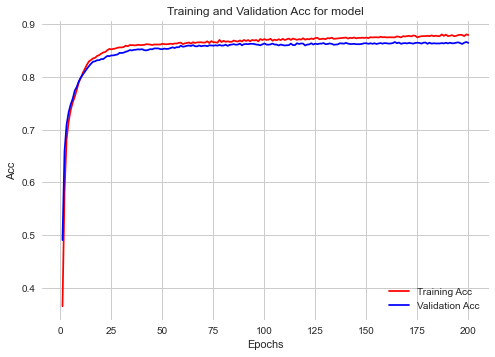

In [23]:
valgraph(history, 'Training and Validation Acc for model')

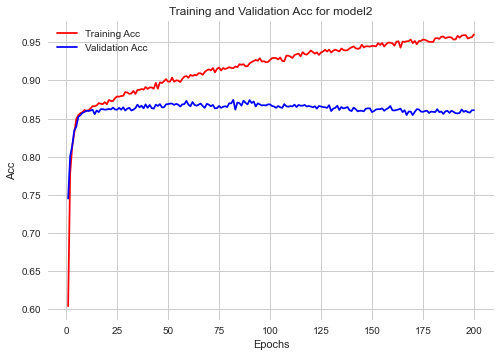

In [24]:
valgraph(history2, 'Training and Validation Acc for model2')

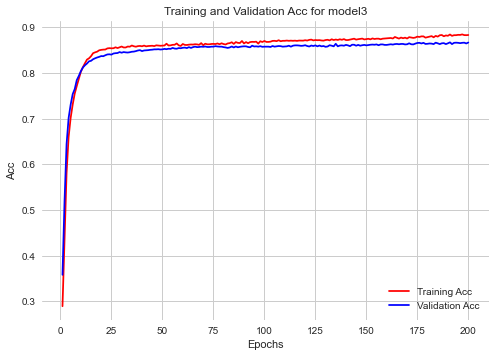

In [25]:
valgraph(history3, 'Training and Validation Acc for model3')

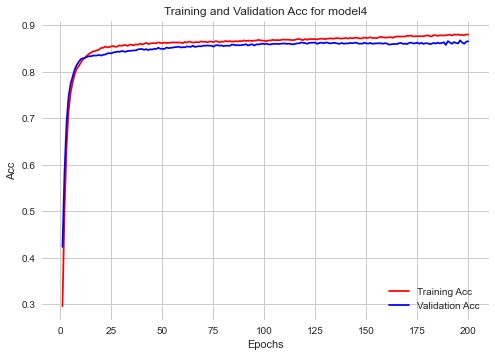

In [26]:
valgraph(history4, 'Training and Validation Acc for model4')

# Cross Validation:

In [27]:
#To load dataset
X, y = get_dataset()
# evaluate model
seconds0 , results0, training0 = evaluate_model(X, y, get_model)
# summarize performance
print('Accuracy: %.3f (%.3f)' % (mean(results0), std(results0)))
print('Execution time: %.3f (%.3f)' % (mean(seconds0), std(seconds0)))
print('Training: %.3f (%.3f)' % (mean(training0), std(training0)))

Training>0.877
>0.852
Training>0.872
>0.842
Training>0.876
>0.858
Training>0.876
>0.848
Training>0.871
>0.866
Training>0.874
>0.873
Training>0.871
>0.891
Training>0.873
>0.861
Training>0.879
>0.873
Training>0.872
>0.843
Accuracy: 0.861 (0.015)
Execution time: 13.150 (0.346)
Training: 0.874 (0.003)


In [28]:
resultsm=pd.DataFrame(np.array([[mean(results0), std(results0)], [mean(seconds0), std(seconds0)], [mean(training0), std(training0)]]),\
                   columns=['mean', 'std deviation'], index=['accuracy','execution time','training'])
resultsm

,mean,std deviation
accuracy,0.860821,0.014763
execution time,13.150347,0.346272
training,0.874075,0.002643


In [29]:
#To load dataset
X, y = get_dataset()
# evaluate model
seconds2 , results2, training2 = evaluate_model(X, y, get_model2)
# summarize performance
print('Accuracy: %.3f (%.3f)' % (mean(results2), std(results2)))
print('Execution time: %.3f (%.3f)' % (mean(seconds2), std(seconds2)))
print('Training: %.3f (%.3f)' % (mean(training2), std(training2)))

resultsm2=pd.DataFrame(np.array([[mean(results2), std(results2)], [mean(seconds2), std(seconds2)], [mean(training2), std(training2)]]),\
                   columns=['mean', 'std deviation'], index=['accuracy','execution time','training'])
resultsm2

Training>0.948
>0.856
Training>0.947
>0.858
Training>0.945
>0.854
Training>0.952
>0.868
Training>0.950
>0.879
Training>0.945
>0.881
Training>0.934
>0.869
Training>0.940
>0.851
Training>0.951
>0.855
Training>0.938
>0.850
Accuracy: 0.862 (0.011)
Execution time: 13.489 (0.773)
Training: 0.945 (0.005)


,mean,std deviation
accuracy,0.862075,0.010696
execution time,13.489426,0.772701
training,0.944857,0.005477


In [30]:
#To load dataset
X, y = get_dataset()
# evaluate model
seconds3 , results3, training3 = evaluate_model(X, y, get_model3)
# summarize performance
print('Accuracy: %.3f (%.3f)' % (mean(results3), std(results3)))
print('Execution time: %.3f (%.3f)' % (mean(seconds3), std(seconds3)))
print('Training: %.3f (%.3f)' % (mean(training3), std(training3)))

Training>0.966
>0.834
Training>0.970
>0.854
Training>0.973
>0.850
Training>0.975
>0.847
Training>0.983
>0.845
Training>0.967
>0.855
Training>0.983
>0.853
Training>0.978
>0.851
Training>0.984
>0.844
Training>0.985
>0.839
Accuracy: 0.847 (0.006)
Execution time: 17.972 (2.416)
Training: 0.976 (0.007)


In [31]:
resultsm3=pd.DataFrame(np.array([[mean(results3), std(results3)], [mean(seconds3), std(seconds3)], [mean(training3), std(training3)]]),\
                   columns=['mean', 'std deviation'], index=['accuracy','execution time','training'])
resultsm3

,mean,std deviation
accuracy,0.847120,0.006396
execution time,17.971869,2.416356
training,0.976251,0.006789


In [32]:
#To load dataset
X, y = get_dataset()
# evaluate model
seconds4 , results4, training4 = evaluate_model(X, y, get_model4)
# summarize performance
print('Accuracy: %.3f (%.3f)' % (mean(results4), std(results4)))
print('Execution time: %.3f (%.3f)' % (mean(seconds4), std(seconds4)))
print('Training: %.3f (%.3f)' % (mean(training4), std(training4)))

Training>0.969
>0.845
Training>0.958
>0.855
Training>0.963
>0.859
Training>0.953
>0.862
Training>0.966
>0.856
Training>0.954
>0.862
Training>0.954
>0.869
Training>0.951
>0.858
Training>0.958
>0.853
Training>0.959
>0.844
Accuracy: 0.856 (0.007)
Execution time: 13.830 (0.629)
Training: 0.958 (0.006)


In [33]:
resultsm4=pd.DataFrame(np.array([[mean(results4), std(results4)], [mean(seconds4), std(seconds4)], [mean(training4), std(training4)]]),\
                   columns=['mean', 'std deviation'], index=['accuracy','execution time','training'])
resultsm4

,mean,std deviation
accuracy,0.856218,0.007244
execution time,13.830466,0.629068
training,0.958486,0.005577


### Assessment

By looking at the kfolds cross validation, the best architecture seems to be get_model2. Nevertheless, we have overfitting.

Let's use dropout and L2 regularization to limit overfitting.

In [34]:
#To get the model
def get_model2_dropout(n_inputs, n_outputs):
    model = Sequential()
    
    model.add(layers.Dense(64, activation='relu', input_dim = n_inputs))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(n_outputs, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
    
    return model

In [35]:
classifier2d = get_model2_dropout(X_train.shape[1], y_train.shape[1])

history2d = classifier2d.fit( X_train, y_train, 
                          epochs=200, batch_size=200,
                          validation_data = (X_test, y_test) )

Epoch 1/200
27/27 [==============================] - 1s 7ms/step - loss: 1.0822 - accuracy: 0.4424 - val_loss: 0.6449 - val_accuracy: 0.7316
Epoch 2/200
27/27 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.6817 - val_loss: 0.4894 - val_accuracy: 0.7989
Epoch 3/200
27/27 [==============================] - 0s 2ms/step - loss: 0.5585 - accuracy: 0.7370 - val_loss: 0.4235 - val_accuracy: 0.8163
Epoch 4/200
27/27 [==============================] - 0s 2ms/step - loss: 0.5015 - accuracy: 0.7452 - val_loss: 0.3902 - val_accuracy: 0.8212
Epoch 5/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4457 - accuracy: 0.7948 - val_loss: 0.3725 - val_accuracy: 0.8289
Epoch 6/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4419 - accuracy: 0.7809 - val_loss: 0.3674 - val_accuracy: 0.8344
Epoch 7/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4224 - accuracy: 0.7923 - val_loss: 0.3564 - val_accuracy: 0.8362
Epoch 8/200
2

Epoch 59/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3066 - accuracy: 0.8563 - val_loss: 0.2915 - val_accuracy: 0.8644
Epoch 60/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3024 - accuracy: 0.8624 - val_loss: 0.2890 - val_accuracy: 0.8637
Epoch 61/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3029 - accuracy: 0.8520 - val_loss: 0.2871 - val_accuracy: 0.8655
Epoch 62/200
27/27 [==============================] - 0s 3ms/step - loss: 0.2978 - accuracy: 0.8560 - val_loss: 0.2875 - val_accuracy: 0.8662
Epoch 63/200
27/27 [==============================] - 0s 2ms/step - loss: 0.2960 - accuracy: 0.8634 - val_loss: 0.2838 - val_accuracy: 0.8637
Epoch 64/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3036 - accuracy: 0.8550 - val_loss: 0.2852 - val_accuracy: 0.8630
Epoch 65/200
27/27 [==============================] - 0s 2ms/step - loss: 0.2984 - accuracy: 0.8639 - val_loss: 0.2851 - val_accuracy: 0.8641
Epoch 

27/27 [==============================] - 0s 2ms/step - loss: 0.2502 - accuracy: 0.8892 - val_loss: 0.2885 - val_accuracy: 0.8780
Epoch 174/200
27/27 [==============================] - 0s 2ms/step - loss: 0.2558 - accuracy: 0.8872 - val_loss: 0.2898 - val_accuracy: 0.8791
Epoch 175/200
27/27 [==============================] - 0s 2ms/step - loss: 0.2585 - accuracy: 0.8883 - val_loss: 0.2870 - val_accuracy: 0.8721
Epoch 176/200
27/27 [==============================] - 0s 2ms/step - loss: 0.2588 - accuracy: 0.8825 - val_loss: 0.2833 - val_accuracy: 0.8797
Epoch 177/200
27/27 [==============================] - 0s 2ms/step - loss: 0.2593 - accuracy: 0.8850 - val_loss: 0.2839 - val_accuracy: 0.8794
Epoch 178/200
27/27 [==============================] - 0s 2ms/step - loss: 0.2464 - accuracy: 0.8891 - val_loss: 0.2824 - val_accuracy: 0.8825
Epoch 179/200
27/27 [==============================] - 0s 2ms/step - loss: 0.2589 - accuracy: 0.8811 - val_loss: 0.2825 - val_accuracy: 0.8818
Epoch 180/200

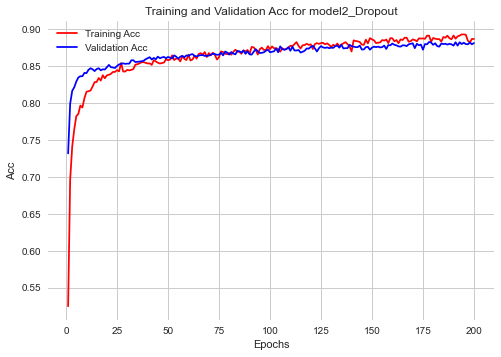

In [36]:
valgraph(history2d, 'Training and Validation Acc for model2_Dropout')

In [37]:
#To load dataset
X, y = get_dataset()
# evaluate model
seconds2drop , results2drop, training2drop = evaluate_model(X, y, get_model2_dropout)
# summarize performance
print('Accuracy: %.3f (%.3f)' % (mean(results2drop), std(results2drop)))
print('Execution time: %.3f (%.3f)' % (mean(seconds2drop), std(seconds2drop)))
print('Training: %.3f (%.3f)' % (mean(training2drop), std(training2drop)))

Training>0.882
>0.886
Training>0.893
>0.870
Training>0.893
>0.888
Training>0.895
>0.873
Training>0.890
>0.879
Training>0.897
>0.899
Training>0.891
>0.880
Training>0.892
>0.878
Training>0.894
>0.887
Training>0.899
>0.865
Accuracy: 0.880 (0.009)
Execution time: 15.394 (1.724)
Training: 0.893 (0.004)


Above we have a great result for the multilayer clasification problem, with a model not prone to overfitting.

In [38]:
resultsm2d=pd.DataFrame(np.array([[mean(results2drop), std(results2drop)], [mean(seconds2drop), std(seconds2drop)], [mean(training2drop), std(training2drop)]]),\
                   columns=['mean', 'std deviation'], index=['accuracy','execution time','training'])
resultsm2d

,mean,std deviation
accuracy,0.880476,0.009276
execution time,15.393595,1.724357
training,0.892642,0.004415


In [39]:
#To get the model
def get_model2_reg(n_inputs, n_outputs):
    model = Sequential()
    
    model.add(layers.Dense(64, kernel_regularizer = regularizers.l2(0.01), activation='relu', input_dim = n_inputs))
    #model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, kernel_regularizer = regularizers.l2(0.01), activation='relu'))
    #model.add(layers.Dropout(0.3))
    model.add(layers.Dense(n_outputs, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
    
    return model

In [40]:
classifier2reg = get_model2_reg(X_train.shape[1], y_train.shape[1])

history2reg = classifier2reg.fit( X_train, y_train, 
                          epochs=200, batch_size=200,
                          validation_data = (X_test, y_test) )

Epoch 1/200
27/27 [==============================] - 1s 8ms/step - loss: 1.9438 - accuracy: 0.5257 - val_loss: 1.4952 - val_accuracy: 0.7578
Epoch 2/200
27/27 [==============================] - 0s 2ms/step - loss: 1.4254 - accuracy: 0.7761 - val_loss: 1.2048 - val_accuracy: 0.8142
Epoch 3/200
27/27 [==============================] - 0s 2ms/step - loss: 1.1593 - accuracy: 0.8090 - val_loss: 1.0173 - val_accuracy: 0.8282
Epoch 4/200
27/27 [==============================] - 0s 2ms/step - loss: 0.9819 - accuracy: 0.8316 - val_loss: 0.8813 - val_accuracy: 0.8372
Epoch 5/200
27/27 [==============================] - 0s 2ms/step - loss: 0.8443 - accuracy: 0.8529 - val_loss: 0.7777 - val_accuracy: 0.8400
Epoch 6/200
27/27 [==============================] - 0s 2ms/step - loss: 0.7561 - accuracy: 0.8568 - val_loss: 0.6967 - val_accuracy: 0.8428
Epoch 7/200
27/27 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.8559 - val_loss: 0.6326 - val_accuracy: 0.8445
Epoch 8/200
2

Epoch 59/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3375 - accuracy: 0.8635 - val_loss: 0.3339 - val_accuracy: 0.8571
Epoch 60/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3420 - accuracy: 0.8644 - val_loss: 0.3360 - val_accuracy: 0.8543
Epoch 61/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3403 - accuracy: 0.8602 - val_loss: 0.3397 - val_accuracy: 0.8498
Epoch 62/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3444 - accuracy: 0.8562 - val_loss: 0.3355 - val_accuracy: 0.8550
Epoch 63/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3346 - accuracy: 0.8650 - val_loss: 0.3362 - val_accuracy: 0.8543
Epoch 64/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3362 - accuracy: 0.8662 - val_loss: 0.3400 - val_accuracy: 0.8536
Epoch 65/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3406 - accuracy: 0.8613 - val_loss: 0.3364 - val_accuracy: 0.8550
Epoch 

27/27 [==============================] - 0s 2ms/step - loss: 0.3142 - accuracy: 0.8681 - val_loss: 0.3227 - val_accuracy: 0.8567
Epoch 174/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3200 - accuracy: 0.8588 - val_loss: 0.3180 - val_accuracy: 0.8606
Epoch 175/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3171 - accuracy: 0.8662 - val_loss: 0.3170 - val_accuracy: 0.8616
Epoch 176/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.8623 - val_loss: 0.3175 - val_accuracy: 0.8595
Epoch 177/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3092 - accuracy: 0.8679 - val_loss: 0.3206 - val_accuracy: 0.8567
Epoch 178/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.8680 - val_loss: 0.3170 - val_accuracy: 0.8613
Epoch 179/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3234 - accuracy: 0.8583 - val_loss: 0.3193 - val_accuracy: 0.8571
Epoch 180/200

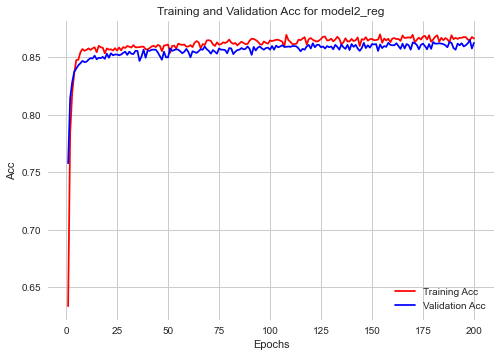

In [41]:
valgraph(history2reg, 'Training and Validation Acc for model2_reg')

In [42]:
#To load dataset
X, y = get_dataset()
# evaluate model
secondsreg , resultsreg, trainingreg = evaluate_model(X, y, get_model2_reg)
# summarize performance
print('Accuracy: %.3f (%.3f)' % (mean(resultsreg), std(resultsreg)))
print('Execution time: %.3f (%.3f)' % (mean(secondsreg), std(secondsreg)))
print('Training: %.3f (%.3f)' % (mean(trainingreg), std(trainingreg)))

Training>0.869
>0.860
Training>0.867
>0.854
Training>0.867
>0.850
Training>0.869
>0.845
Training>0.854
>0.845
Training>0.866
>0.874
Training>0.858
>0.860
Training>0.852
>0.850
Training>0.867
>0.857
Training>0.870
>0.857
Accuracy: 0.855 (0.008)
Execution time: 15.208 (0.802)
Training: 0.864 (0.006)


In [43]:
resultsm2r=pd.DataFrame(np.array([[mean(resultsreg), std(resultsreg)], [mean(secondsreg), std(secondsreg)], [mean(trainingreg), std(trainingreg)]]),\
                   columns=['mean', 'std deviation'], index=['accuracy','execution time','training'])
resultsm2r

,mean,std deviation
accuracy,0.855171,0.008234
execution time,15.207894,0.802020
training,0.863862,0.006462


# Getting the results for analysis:

Let's get a dataframe with the results:

In [44]:
df_results = pd.DataFrame( data = {'model': ['model0' for i in range(10)],
                                   'seconds': seconds0,
                                   'trainingacc': training0,
                                   'valacc': results0})

for time, result, trn, name in zip([seconds2, seconds3, seconds4, seconds2drop, secondsreg], 
                                   [results2, results3, results4, results2drop, trainingreg],
                                   [training2, training3, training4, training2drop, resultsreg],
                                   ['model2', 'model3', 'model4', 'model2_dropout', 'model2_reg']):
    
    df_results = df_results.append(
        pd.DataFrame( data = {'model': [name for i in range(10)],
                              'seconds': time,
                              'trainingacc': trn,
                              'valacc': result}) )

In [45]:
df_results.to_csv('Data\multilayer_results.csv', index=False)

In [46]:
df_results.groupby(by='model').agg({'std','mean'})

seconds            trainingacc              valacc          
                     std       mean         std      mean       std      mean
model                                                                        
model0          0.365003  13.150347    0.002786  0.874075  0.015561  0.860821
model2          0.814499  13.489426    0.005773  0.944857  0.011275  0.862075
model2_dropout  1.817632  15.393595    0.004654  0.892642  0.009778  0.880476
model2_reg      0.845404  15.207894    0.008680  0.855171  0.006811  0.863862
model3          2.547063  17.971869    0.007157  0.976251  0.006742  0.847120
model4          0.663096  13.830466    0.005879  0.958486  0.007636  0.856218